# Case Study - Stroke

In [367]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
# Read data
df= pd.read_csv("C:/Users/TEEM/Desktop/stroke_data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [369]:
#Display column
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [370]:
df.shape

(5110, 12)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [372]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [373]:
#Count value stroke
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Check unique data

In [374]:
#check unique data
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [375]:
#remove id column
df = df.drop('id', axis=1)

In [376]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Check duplicate value

In [377]:
#Check duplicate data

df.duplicated().sum()

0

## Check missing value

In [378]:
#check missing value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [379]:
#fill missing values
#BMI is an important feature
#find mean 
bmi_mean = round(df['bmi'].mean(), 1)
bmi_mean

28.9

In [380]:
#fill the missing data
df['bmi'].fillna(bmi_mean, inplace=True)

In [381]:
#check missing data again
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# EDA (Exploratory_Data_Analysis)

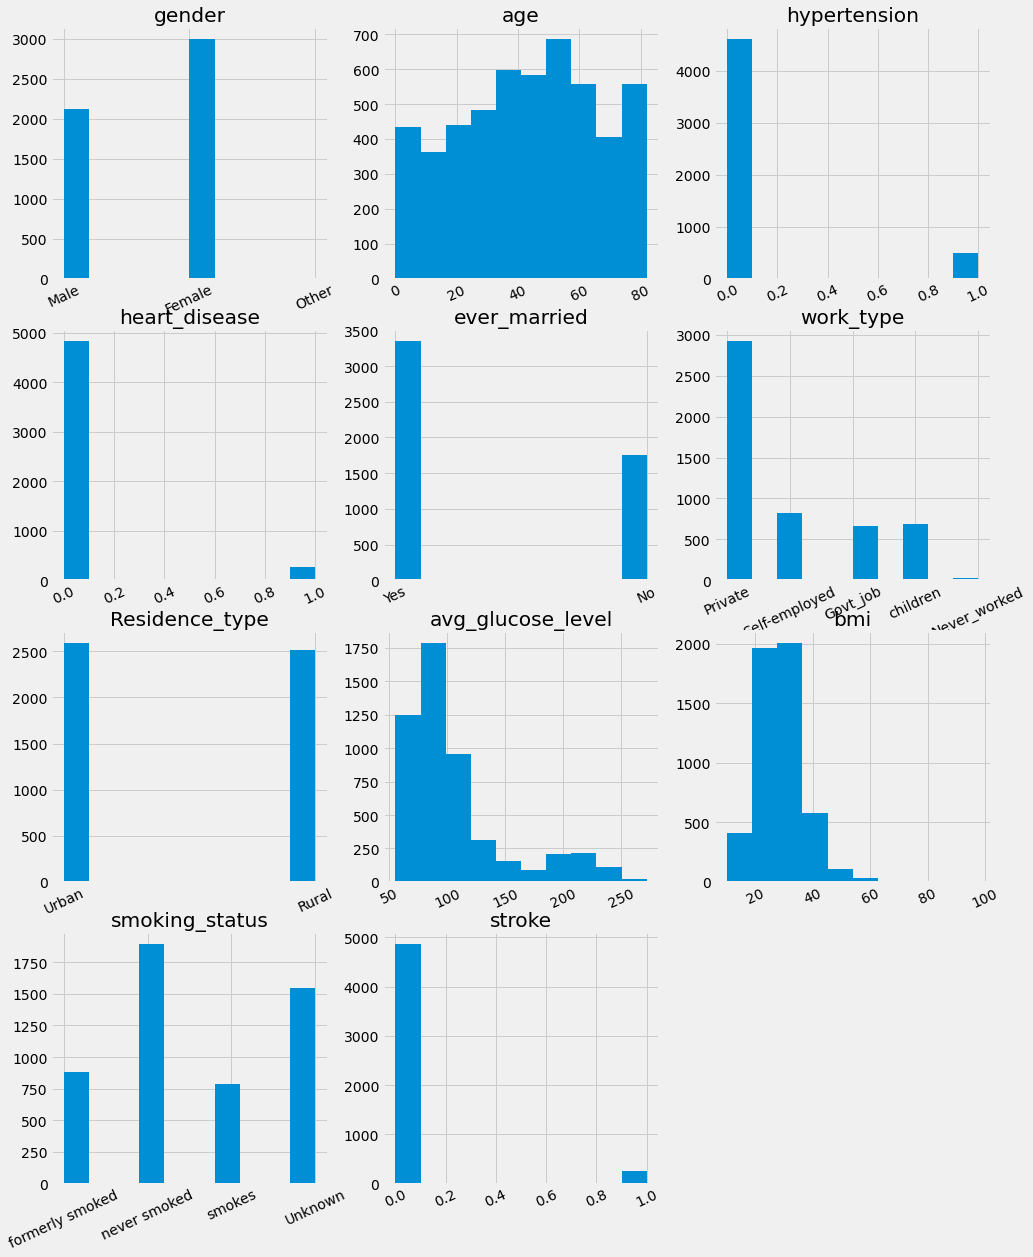

In [382]:
# histogram
plt.figure(figsize=(15,25))
for i in range(len(df.columns)):
    plt.subplot(5,3,i+1)
    plt.title(df.columns[i])
    plt.xticks(rotation=25)
    plt.hist(df[df.columns[i]])
    
plt.show()

## Univariate Analysis of Numerical variables

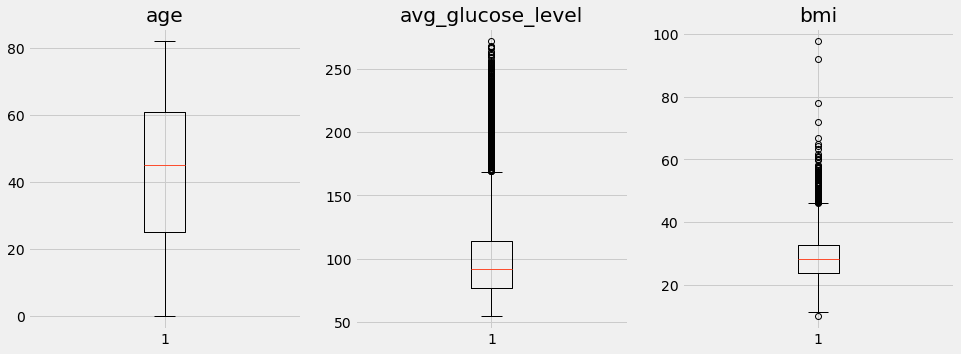

In [383]:
#Box plot to see outlier
plt.figure(figsize=(20,30))
df_numerical = df[['age', 'avg_glucose_level', 'bmi']]
for i in range(len(df_numerical.columns)):
    plt.subplot(5,4,i+1)
    plt.title(df_numerical.columns[i])
    plt.boxplot(df_numerical[df_numerical.columns[i]])
    
plt.show()

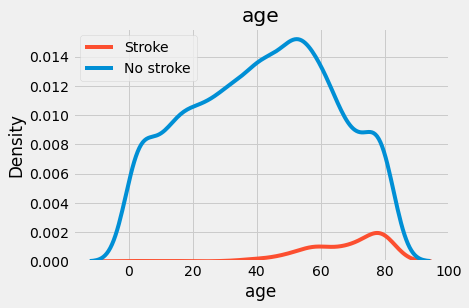

In [384]:
#Relative frequency graph
sns.kdeplot(data=df, x='age', hue='stroke')
plt.title('age')
plt.legend(['Stroke', 'No stroke'])

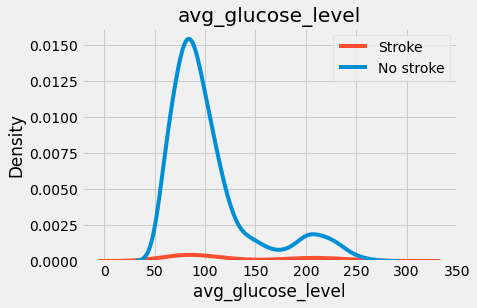

In [385]:
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke')
plt.title('avg_glucose_level')
plt.legend(['Stroke', 'No stroke'])

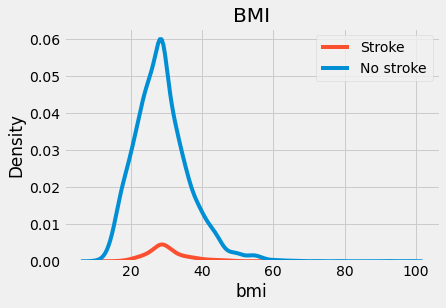

In [386]:
sns.kdeplot(data=df, x='bmi', hue='stroke')
plt.title('BMI')
plt.legend(['Stroke', 'No stroke'])

## Univariate Analysis of Categorical Variables

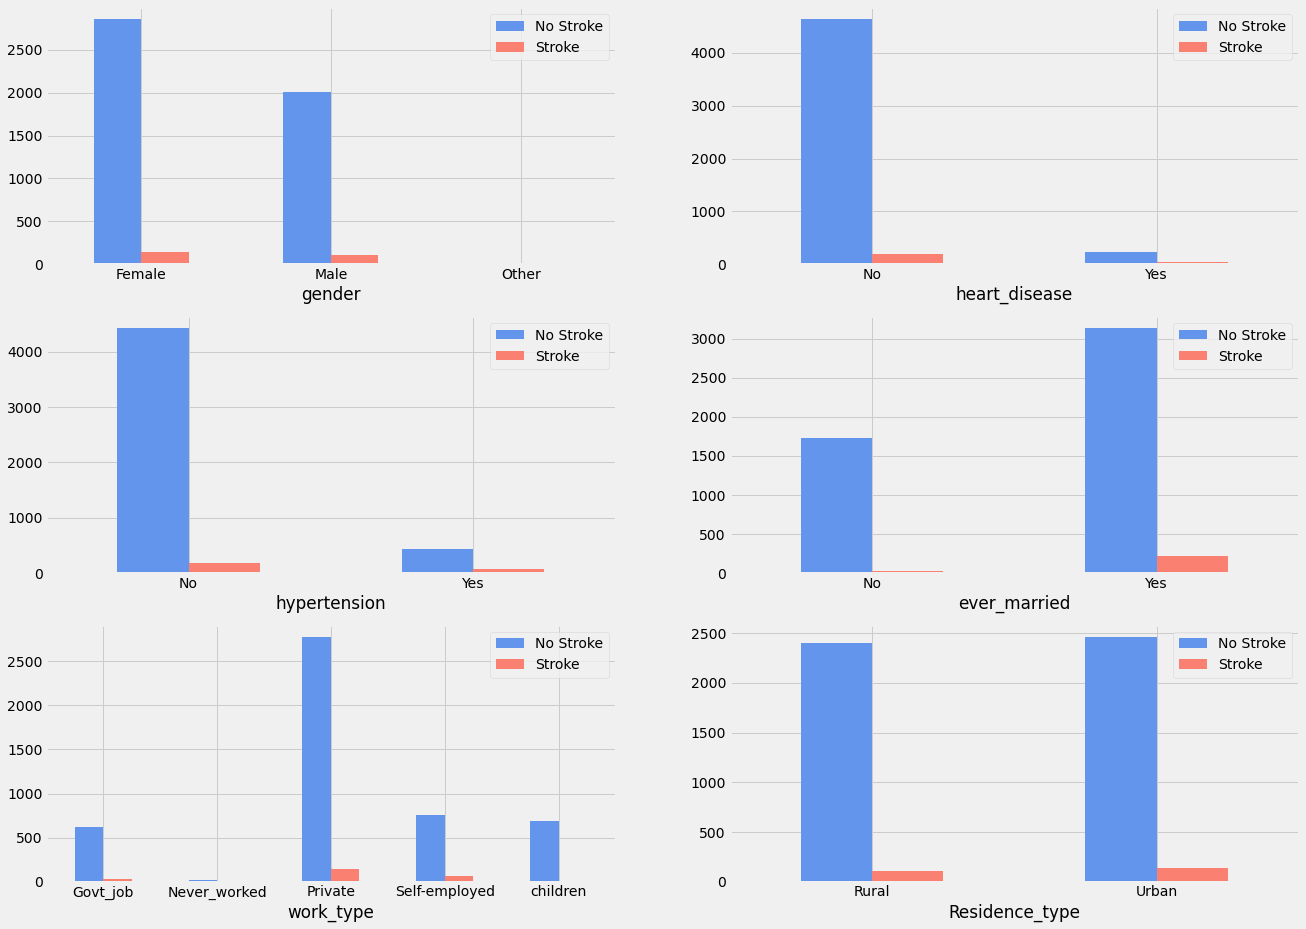

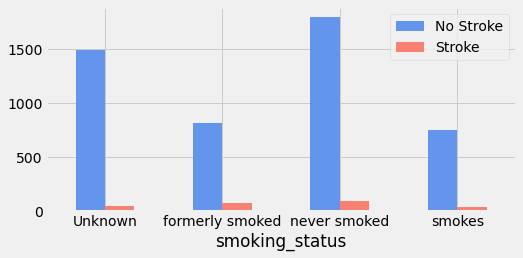

In [387]:
#Relative frequency bar char
ct1 = pd.crosstab(df.gender, df.stroke)
ct2 = pd.crosstab(df.heart_disease, df.stroke)
ct3 = pd.crosstab(df.hypertension, df.stroke)
ct4 = pd.crosstab(df.ever_married, df.stroke)
ct5 = pd.crosstab(df.work_type, df.stroke)
ct6 = pd.crosstab(df.Residence_type, df.stroke)
ct7 = pd.crosstab(df.smoking_status, df.stroke)

# Setting the colors
colors = ["cornflowerblue", "salmon"]

# Setting up the figure and different axes on the figure
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,
                                            ncols=2, 
                                            figsize=(20,15))

fig,((ax7)) = plt.subplots(1, 1, figsize=(7.5,3.5))

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0)
ct5.plot(kind='bar',ax=ax5,color=colors,rot=0)
ct6.plot(kind='bar',ax=ax6,color=colors,rot=0)
ct7.plot(kind='bar',ax=ax7,color=colors,rot=0);

# Setting x labels for heart_disease and hypertension
ax2.set_xticklabels(["No","Yes"])
ax3.set_xticklabels(["No","Yes"])

# Changing the lables of the legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke'])
ax5.legend(labels=['No Stroke', 'Stroke'])
ax6.legend(labels=['No Stroke', 'Stroke'])
ax7.legend(labels=['No Stroke', 'Stroke']);

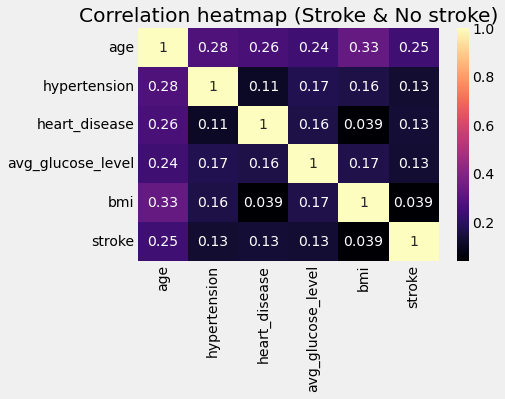

In [388]:
#Correlation heatmap (Stroke & No stroke) : age
# Create a correlation matrix
corr_matrix = df.corr()

# Generate the heatmap
graph = sns.heatmap(corr_matrix,cmap='magma', annot=True)
graph.set_title('Correlation heatmap (Stroke & No stroke)')

# Show the plot
plt.show()

In [389]:
#Separate class stroke & no stroke
df0 = df[df['stroke']==0]
df1 = df[df['stroke']==1]

In [390]:
#No stroke
len(df0)

4861

In [391]:
#Stroke
len(df1)

249

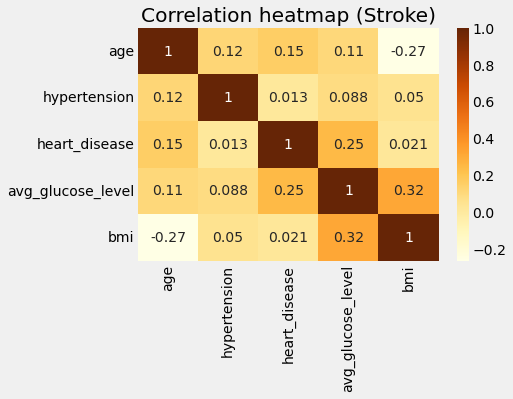

In [392]:
#Correlation heatmap (Stroke) : avg_glucose_level
# Create a correlation matrix
corr_matrix = df1.iloc[:,:-1].corr()

# Generate the heatmap
graph = sns.heatmap(corr_matrix,cmap='YlOrBr', annot=True)
graph.set_title('Correlation heatmap (Stroke)')

# Show the plot
plt.show()

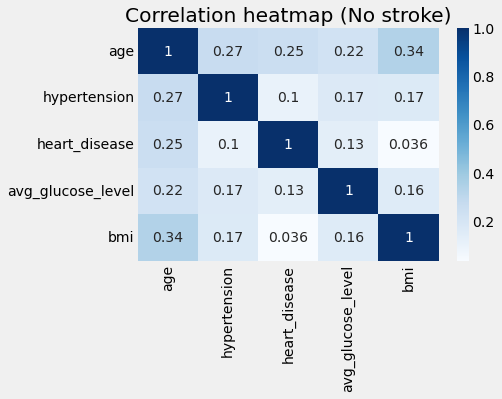

In [393]:
#Correlation heatmap (No stroke) : age
# Create a correlation matrix
corr_matrix = df0.iloc[:,:-1].corr() 

# Generate the heatmap
graph = sns.heatmap(corr_matrix,cmap='Blues', annot=True)
graph.set_title('Correlation heatmap (No stroke)')

# Show the plot
plt.show()

## Bivariate

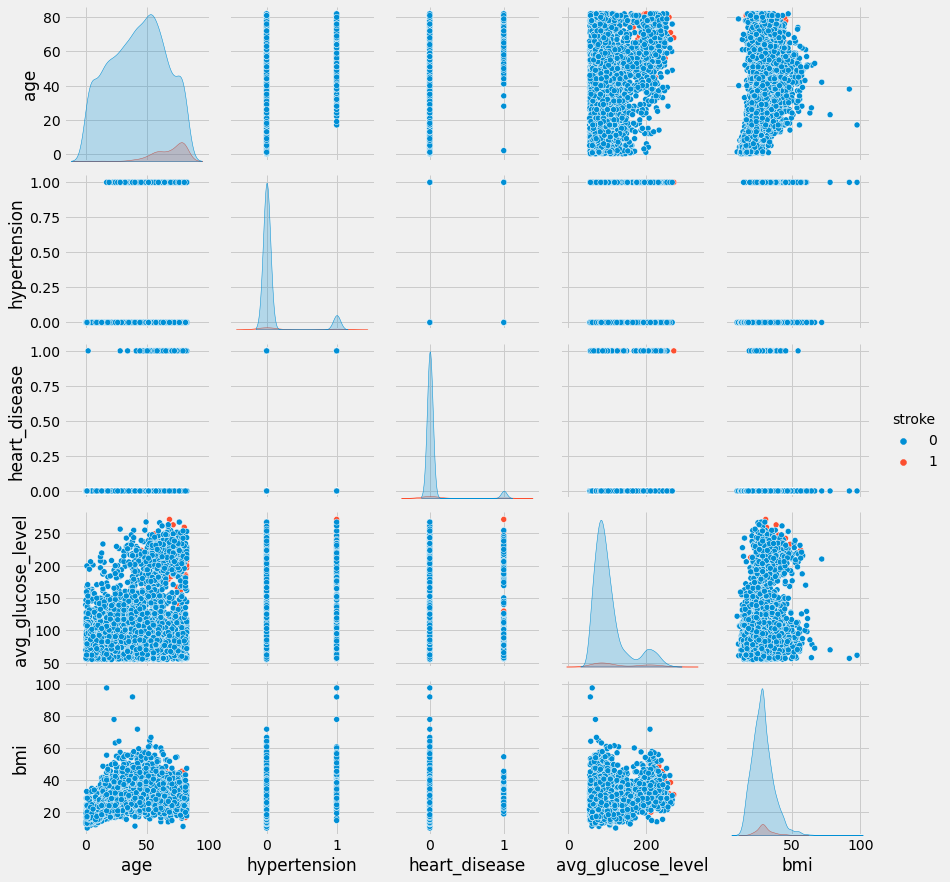

In [394]:
#Pair plot 
#Scatter plot 2 relationships (numerical variable)
sns.pairplot(df, hue='stroke');

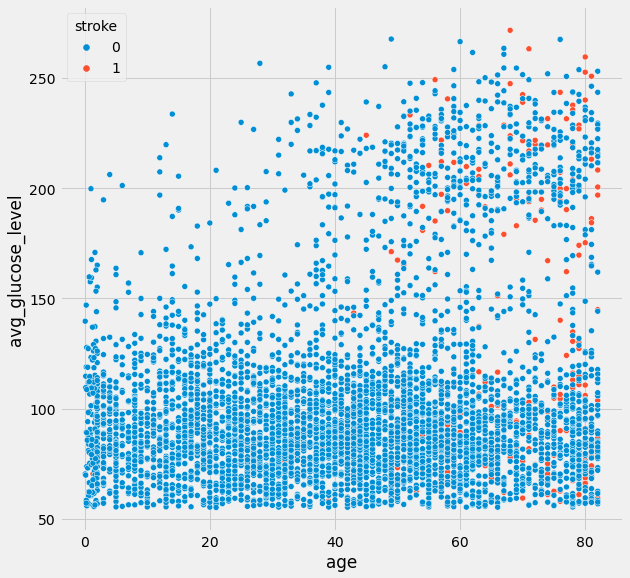

In [395]:
#age x avg_glucose_level
plt.figure(figsize=(9,9))
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue='stroke')
plt.show()

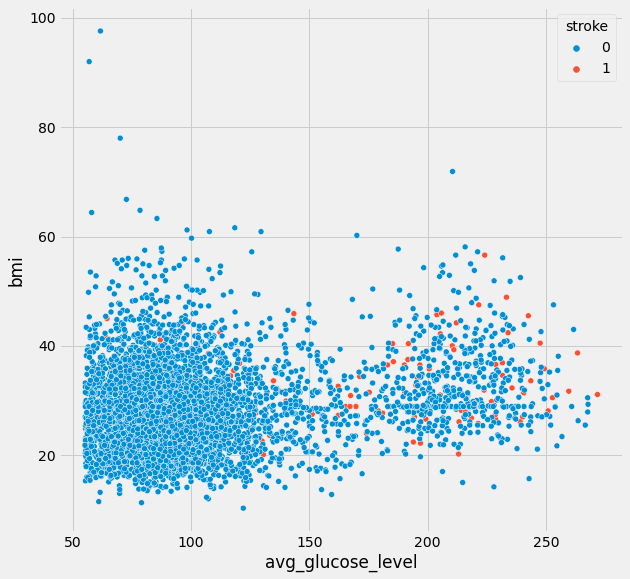

In [396]:
#avg_glucose_level x bmi
plt.figure(figsize=(9,9))
sns.scatterplot(data = df, x = 'avg_glucose_level', y = 'bmi', hue='stroke')
plt.show()

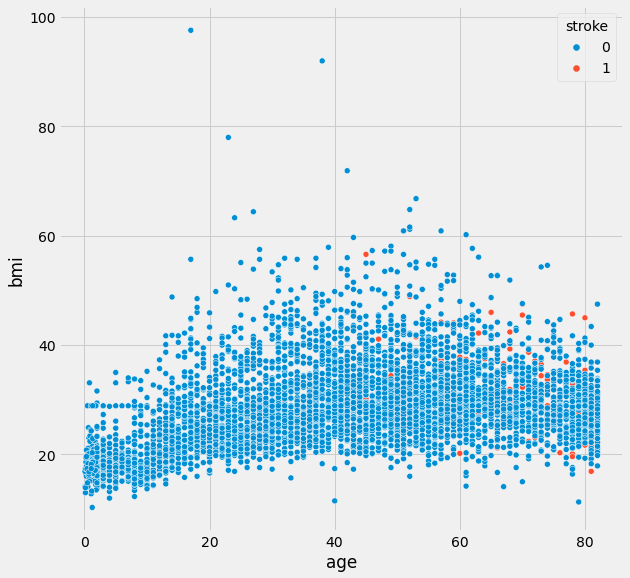

In [397]:
#age x bmi
plt.figure(figsize=(9,9))
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue='stroke')
plt.show()

## Data Preprocessing

In [398]:
#remove other gender
#If very few people have a gender value of "Other" then it might be better to drop them
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [399]:
df.drop(df[df['gender'] == 'Other'].index, axis=0, inplace=True)

In [400]:
df.shape

(5109, 11)

In [401]:
#Convert catogorical variable to numerical variable
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

col = ['ever_married','Residence_type','gender','work_type', 'smoking_status']
for i in col:
    df[i] = le.fit_transform(df[i])   

In [402]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.9,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [403]:
columnX = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

In [404]:
columnY = ['No stroke (1)', 'Stroke (0)']

## Modelling

In [405]:
X = df.drop('stroke',axis=1).values
y = df['stroke'].values

In [406]:
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,  28.9 ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [407]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [408]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [409]:
# Standardizing our training and testing data.
# perform feature scaling after splitting the data into training and testing sets in order to avoid data leakage.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [410]:
# Adding upsampling data
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print(f"Before Upsampling: {counter}")

upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Before Upsampling: Counter({0: 3900, 1: 187})
Counter({0: 3900, 1: 3900})


In [411]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus , random_state =43, test_size = 0.2)

## Without GridSearchCV

In [412]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)

In [413]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [414]:
DecisionTree_predictions = DecisionTree.predict(X_test)

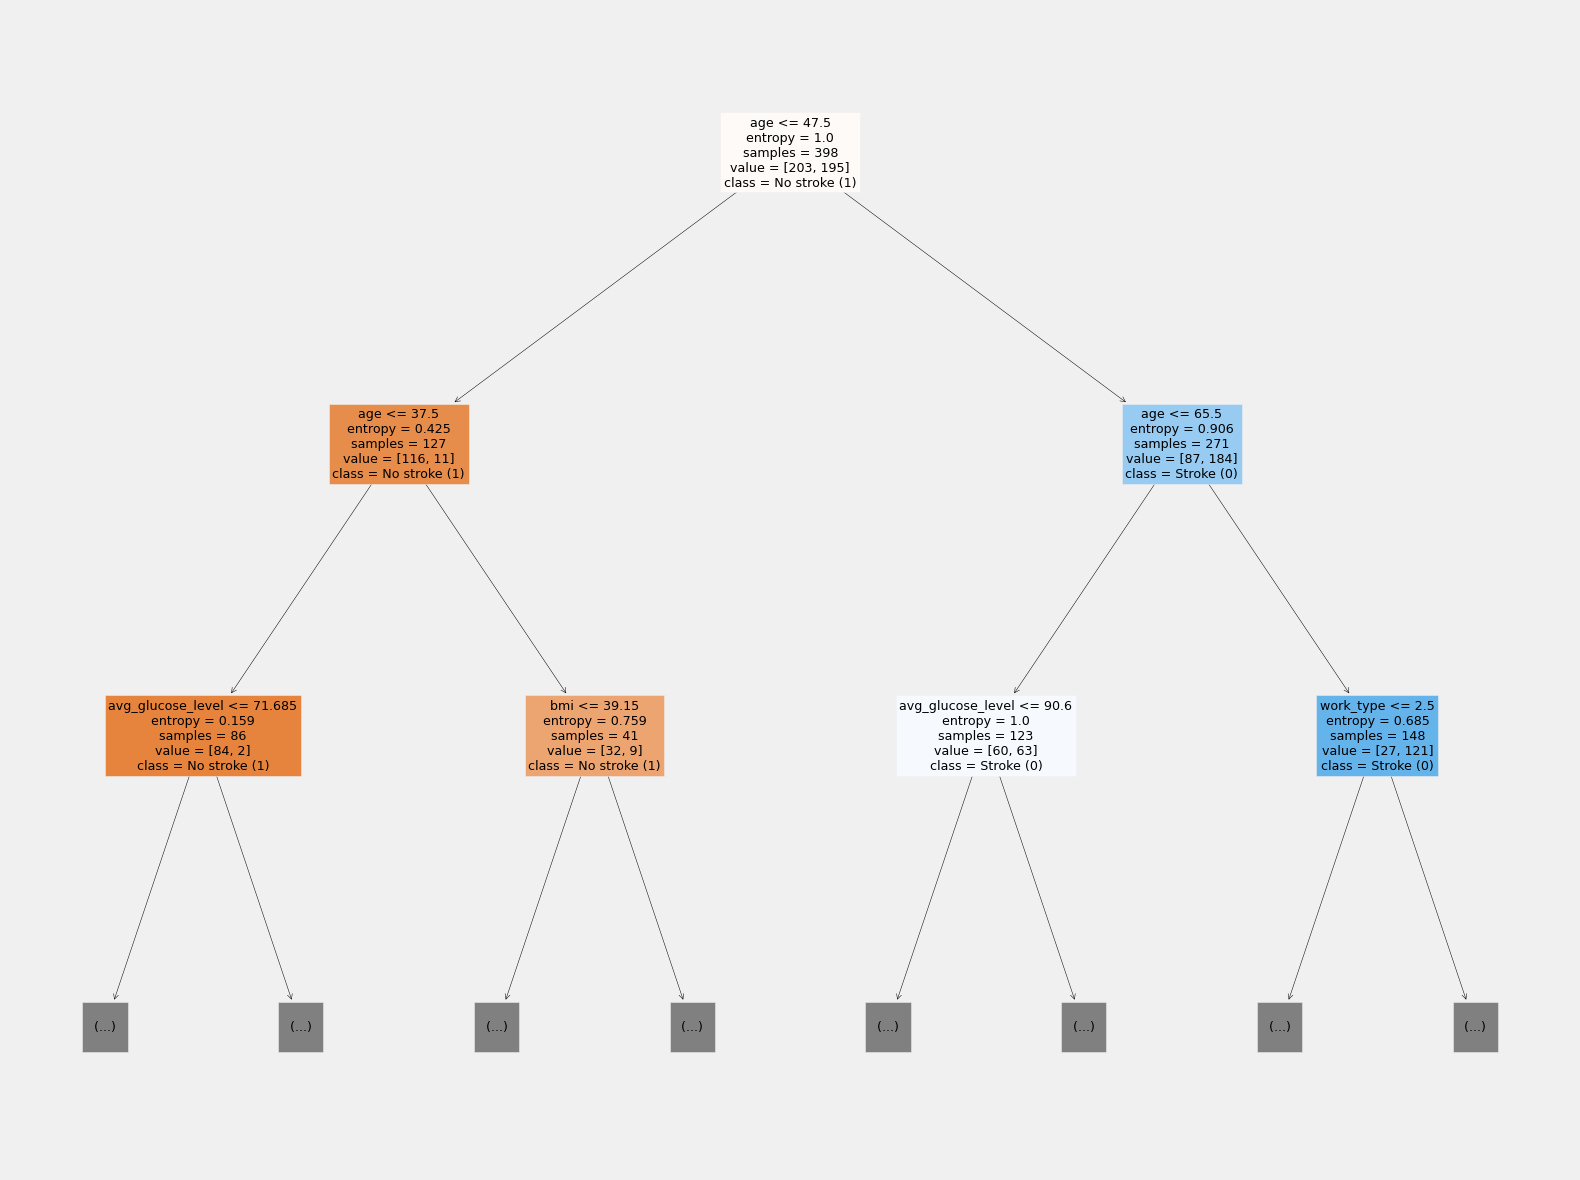

In [415]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTree, 
                   feature_names = columnX,
                   class_names = columnY,
                   max_depth = 2,
                   filled=True)

In [416]:
fig.savefig("decistion_tree.png")

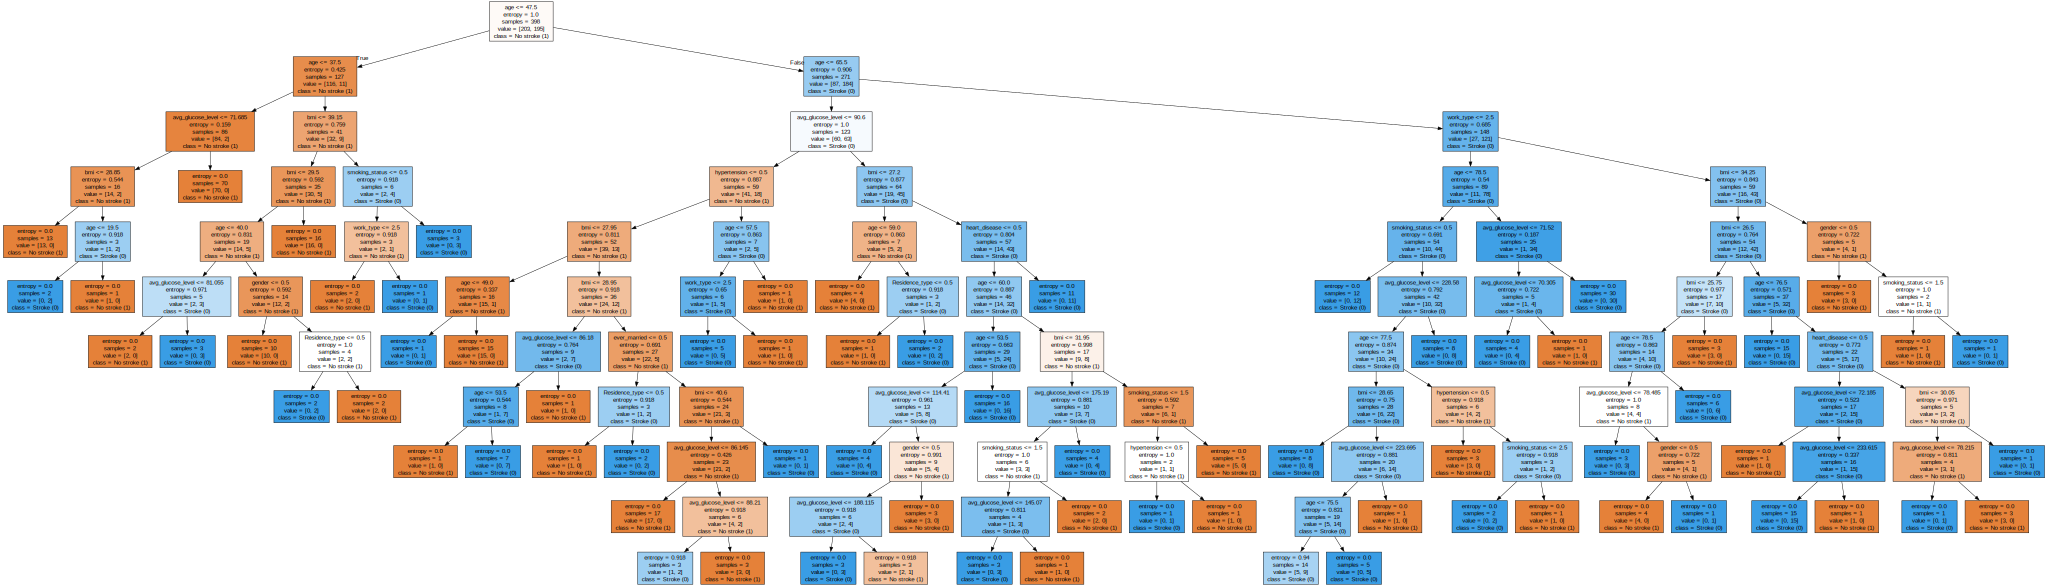

In [417]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(DecisionTree, out_file=None, 
                                feature_names=columnX,  
                                class_names=columnY,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [418]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [419]:
from sklearn import tree

text_representation = tree.export_text(DecisionTree, feature_names=columnX)
print(text_representation)

|--- age <= 47.50
|   |--- age <= 37.50
|   |   |--- avg_glucose_level <= 71.69
|   |   |   |--- bmi <= 28.85
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  28.85
|   |   |   |   |--- age <= 19.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  19.50
|   |   |   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  71.69
|   |   |   |--- class: 0
|   |--- age >  37.50
|   |   |--- bmi <= 39.15
|   |   |   |--- bmi <= 29.50
|   |   |   |   |--- age <= 40.00
|   |   |   |   |   |--- avg_glucose_level <= 81.06
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_glucose_level >  81.06
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  40.00
|   |   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- gender >  0.50
|   |   |   |   |   |   |--- Residence_type <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Residence_type >  0.50
|   |   |   |   |   |   |   |--- class

In [420]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}
LogisticRegression = LogisticRegression(    random_state=42,
    class_weight="balanced",
    solver="liblinear",)

In [421]:
LogisticRegression.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [422]:
LogisticRegression_predictions = LogisticRegression.predict(X_test)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

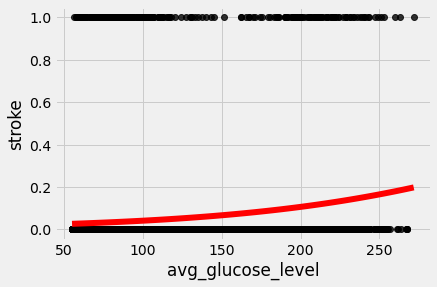

In [423]:
x = df['avg_glucose_level']
y = df['stroke']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [424]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

RandomForest =  RandomForestClassifier(random_state=42,
    class_weight='balanced')

In [425]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [426]:
RandomForest_predictions = RandomForest.predict(X_test)

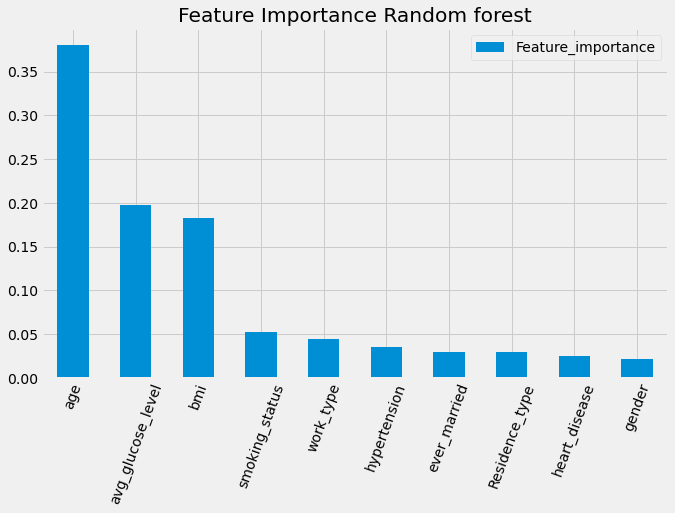

In [427]:
feature_score = pd.DataFrame(RandomForest.feature_importances_, index =columnX,#df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance Random forest');

In [428]:
#Gradient boosting
from xgboost import XGBClassifier

parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}
xgb = XGBClassifier(tree_method = 'hist', enable_categorical = True, 
                        max_cat_to_onehot = 2, learning_rate = 0.01)

In [429]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=2, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [430]:
xgb_predictions = xgb.predict(X_test)

In [431]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

In [432]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [433]:
naive_bayes_predictions = naive_bayes.predict(X_test)

In [472]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [473]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [474]:
knn_predictions = RandomForest.predict(X_test)

In [437]:
#SVM
from sklearn.svm import SVC

svm = SVC(random_state = 0, kernel = 'linear')

In [438]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [439]:
svm_predictions = svm.predict(X_test)

## With GridSearchCV

In [440]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DecisionTree = GridSearchCV(
    DecisionTree, 
    parameters, 
    cv=5)

DecisionTree.fit(X_train,y_train)
DecisionTree_predictions = DecisionTree.predict(X_test)

In [441]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}
LogisticRegression = LogisticRegression(    random_state=42,
    class_weight="balanced",
    solver="liblinear",)

LogisticRegression = GridSearchCV(
    LogisticRegression, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

LogisticRegression.fit(X_train, y_train)
LogisticRegression_predictions = LogisticRegression.predict(X_test)

In [442]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

RandomForest =  RandomForestClassifier(random_state=42,
    class_weight='balanced')

RandomForest = GridSearchCV(
    RandomForest, 
    parameters, 
    cv=5,
)
RandomForest.fit(X_train, y_train)
RandomForest_predictions = RandomForest.predict(X_test)

In [443]:
#Gradient boosting
from xgboost import XGBClassifier

parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}
xgb = XGBClassifier(tree_method = 'hist', enable_categorical = True, 
                        max_cat_to_onehot = 2, learning_rate = 0.01)

xgb = GridSearchCV(
    xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

In [445]:
#SVM
from sklearn.svm import SVC

svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
             'kernel': ['rbf']} 

svm = SVC(random_state=42)

svm = GridSearchCV(svm,svm_param_grid)

svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

In [446]:
#Color DT tree
#Class node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf(self):
        return self.value is not None

#Class DecisionTreeNew
class DecisionTreeNew:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _is_finished(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False
    
    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def _create_split(self, X, thresh):
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        split = {'score':- 1, 'feat': None, 'thresh': None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['thresh'] = thresh

        return split['feat'], split['thresh']
    
    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # get best split
        rnd_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)

        # grow children recursively
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)
    
    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


#Train color decision tree
DT = DecisionTreeNew(max_depth=10)
DT.fit(X_train,y_train) 
DT_predictions = DT.predict(X_test)

## Measurement

In [447]:
#Decision Tree
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

train_score = DecisionTree.score(X_train, y_train)
test_score = DecisionTree.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8567839195979899
Test Score: 0.74


In [448]:
print(classification_report(y_test, DecisionTree_predictions))
print()
print('Weighted F1 score: ', f1_score(y_test, DecisionTree_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, DecisionTree_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, DecisionTree_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, DecisionTree_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        46
           1       0.77      0.74      0.75        54

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100


Weighted F1 score:  0.7403131272581293
F1 score:  0.7547169811320754
auc score:  0.7399355877616747
roc_auc score:  0.7399355877616747


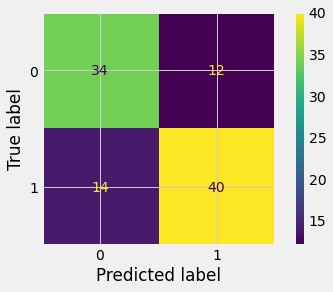

In [449]:
ConfusionMatrixDisplay.from_predictions(y_test, DecisionTree_predictions)

In [450]:
#Logistic regression
train_score = LogisticRegression.score(X_train, y_train)
test_score = LogisticRegression.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.7788944723618091
Test Score: 0.79


In [451]:
print(classification_report(y_test, LogisticRegression_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, LogisticRegression_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, LogisticRegression_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, LogisticRegression_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, LogisticRegression_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        46
           1       0.82      0.78      0.80        54

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100


weighted F1 score:  0.7903157894736842
F1 score:  0.7999999999999999
auc score:  0.7910628019323671
roc_auc score:  0.7910628019323671


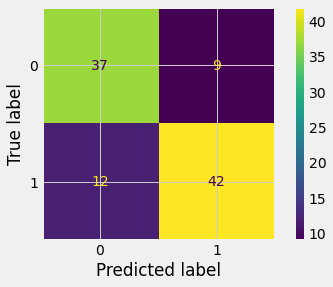

In [452]:
ConfusionMatrixDisplay.from_predictions(y_test, LogisticRegression_predictions)

In [453]:
#Random forest
train_score = RandomForest.score(X_train, y_train)
test_score = RandomForest.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.7964824120603015
Test Score: 0.83


In [454]:
print(classification_report(y_test, RandomForest_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, RandomForest_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, RandomForest_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, RandomForest_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, RandomForest_predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.84      0.85      0.84        54

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100


weighted F1 score:  0.8298457505796955
F1 score:  0.8440366972477065
auc score:  0.8280998389694042
roc_auc score:  0.8280998389694042


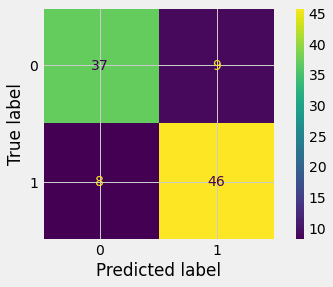

In [455]:
ConfusionMatrixDisplay.from_predictions(y_test, RandomForest_predictions)

In [456]:
#Gradient boosting
train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8391959798994975
Test Score: 0.82


In [457]:
print(classification_report(y_test, xgb_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, xgb_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, xgb_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, xgb_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, xgb_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        46
           1       0.83      0.83      0.83        54

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100


weighted F1 score:  0.82
F1 score:  0.8333333333333334
auc score:  0.818840579710145
roc_auc score:  0.818840579710145


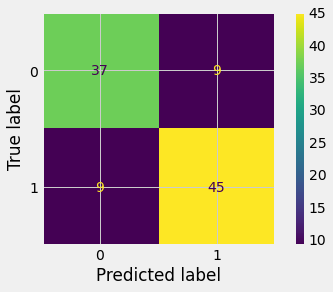

In [458]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_predictions)

In [459]:
#Naive bayes
train_score = naive_bayes.score(X_train, y_train)
test_score = naive_bayes.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.7587939698492462
Test Score: 0.7


In [460]:
print(classification_report(y_test, naive_bayes_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, naive_bayes_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, naive_bayes_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, naive_bayes_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, naive_bayes_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.64      0.78      0.71        46
           1       0.77      0.63      0.69        54

    accuracy                           0.70       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.71      0.70      0.70       100


weighted F1 score:  0.6993997599039616
F1 score:  0.6938775510204083
auc score:  0.7061191626409018
roc_auc score:  0.7061191626409018


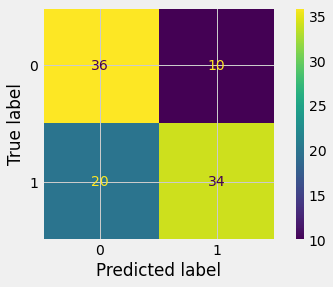

In [461]:
ConfusionMatrixDisplay.from_predictions(y_test, naive_bayes_predictions)

In [475]:
#K-NN
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8190954773869347
Test Score: 0.76


In [476]:
print(classification_report(y_test, knn_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, knn_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, knn_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, knn_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, knn_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.84      0.85      0.84        54

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100


weighted F1 score:  0.8298457505796955
F1 score:  0.8440366972477065
auc score:  0.8280998389694042
roc_auc score:  0.8280998389694042


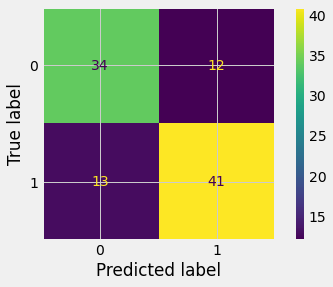

In [463]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)

In [464]:
#SVM
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.7989949748743719
Test Score: 0.8


In [465]:
print(classification_report(y_test, svm_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, svm_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, svm_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, svm_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, svm_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        46
           1       0.85      0.76      0.80        54

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100


weighted F1 score:  0.8002400960384154
F1 score:  0.8039215686274509
auc score:  0.8035426731078905
roc_auc score:  0.8035426731078905


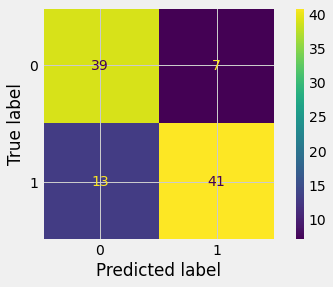

In [466]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)

In [467]:
#Color DT tree
test_score = accuracy(y_test, DT_predictions)

print(f'Test Score: {test_score}')

Test Score: 0.7


In [468]:
print(classification_report(y_test, DT_predictions))
print()
print('weighted F1 score: ', f1_score(y_test, DT_predictions, average = 'weighted'))
print('F1 score: ', f1_score(y_test, DT_predictions))

fp_rate, tp_rate, thresholds = roc_curve(y_test, DT_predictions)
print('auc score: ', auc(fp_rate, tp_rate)) 
print('roc_auc score: ', roc_auc_score(y_test, DT_predictions, average = 'weighted'))

              precision    recall  f1-score   support

           0       0.64      0.78      0.71        46
           1       0.77      0.63      0.69        54

    accuracy                           0.70       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.71      0.70      0.70       100


weighted F1 score:  0.6993997599039616
F1 score:  0.6938775510204083
auc score:  0.7061191626409018
roc_auc score:  0.7061191626409018


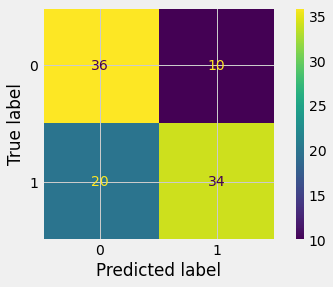

In [469]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_predictions)

In [470]:
import lime
import lime.lime_tabular

import pandas as pd
import numpy as np
import lightgbm as lgb

# For converting textual categories to integer labels 
from sklearn.preprocessing import LabelEncoder

# for creating train test split
from sklearn.model_selection import train_test_split

# specify your configurations as a dict
lgb_params = {
    'task': 'train',
    'boosting_type': 'goss',
    'objective': 'binary',
    'metric':'binary_logloss',
    'metric': {'l2', 'auc'},
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbose': None,
    'num_iteration':100,
    'num_threads':7,
    'max_depth':12,
    'min_data_in_leaf':100,
    'alpha':0.5}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)


# training the lightgbm model
model = lgb.train(lgb_params,lgb_train,num_boost_round=20,valid_sets=lgb_eval,early_stopping_rounds=5)


# this is required as LIME requires class probabilities in case of classification example
# LightGBM directly returns probability for class 1 by default 

def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))
    
explainer = lime.lime_tabular.LimeTabularExplainer(df[columnX].astype(int).values,  
mode='classification',training_labels=df['stroke'],feature_names=columnX)

# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(df.loc[i,columnX].astype(int).values, prob, num_features=5)


C:\Users\TEEM\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\TEEM\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 195, number of negative: 203
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 7
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489950 -> initscore=-0.040206
[LightGBM] [Info] Start training from score -0.040206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.842995	valid_0's l2: 0.233258
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.883253	valid_0's l2: 0.215569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.883253	val

In [471]:
exp.show_in_notebook(show_table=True)